# Advance Loan Prediction System

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
loan_dataset = pd.read_csv('dataset.csv')

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [4]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# check karenge ki kitne row aur columns hai
loan_dataset.shape

(614, 13)

In [6]:
# Check karte hai kiski value kitni hai 
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Missing values ko nikalenge
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Hum missing value ko nikal denge kyuki yaha par ctegorical value bhi null hai jisme hum mean ya koi bhi value nahi fill kar sakte
loan_dataset = loan_dataset.dropna()

In [9]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# Label encoding karenge matlab ki categorical value ko 0 ya 1 se replace kar denge
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}}).inplace=True

In [11]:
# Checking whether label is done or not
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [12]:
#Find the Dependent column values because it helps for giving loan
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [13]:
# Hum ye chahenge ki agar kisi ke pass 3 se jyada dependent hai toh hum use alag category me rakhenge jisse ki prection ke samay aasani ho
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [14]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

# Data Visualisation

<AxesSubplot: xlabel='Education', ylabel='count'>

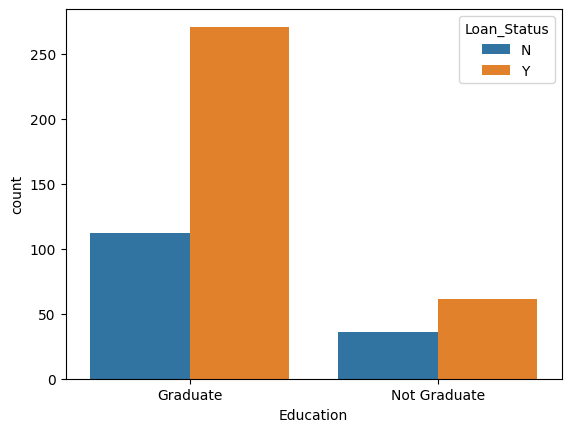

In [15]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<AxesSubplot: xlabel='Married', ylabel='count'>

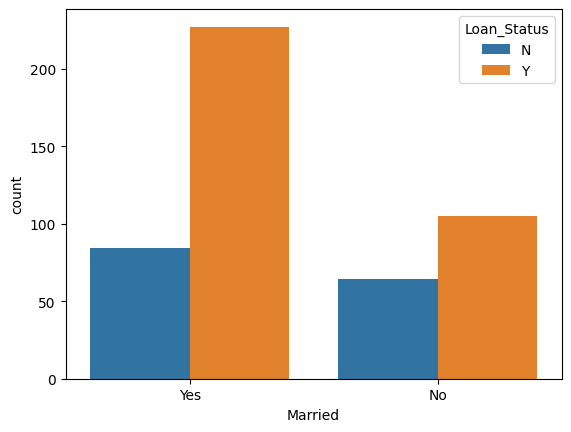

In [16]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

<AxesSubplot: xlabel='Self_Employed', ylabel='count'>

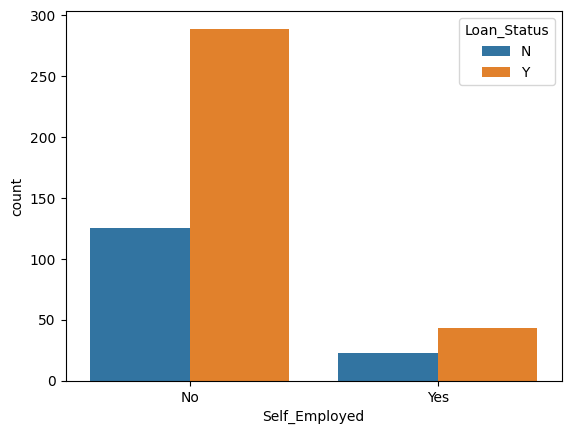

In [17]:
# Employement Status & Loan Status
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_dataset)

<AxesSubplot: xlabel='Credit_History', ylabel='count'>

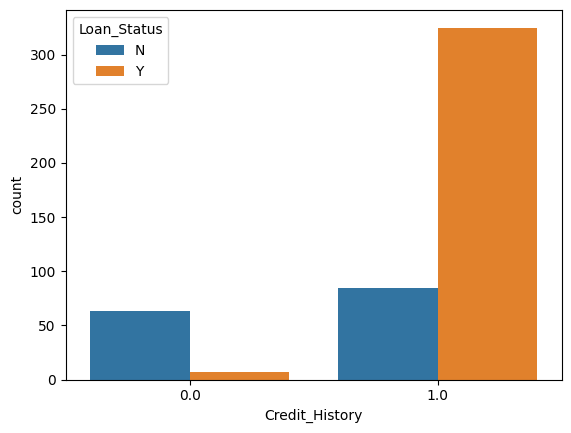

In [18]:
# Income Status & Loan Status
sns.countplot(x='Credit_History',hue='Loan_Status',data=loan_dataset)

array([[<AxesSubplot: xlabel='ApplicantIncome', ylabel='ApplicantIncome'>,
        <AxesSubplot: xlabel='CoapplicantIncome', ylabel='ApplicantIncome'>],
       [<AxesSubplot: xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>,
        <AxesSubplot: xlabel='CoapplicantIncome', ylabel='CoapplicantIncome'>]],
      dtype=object)

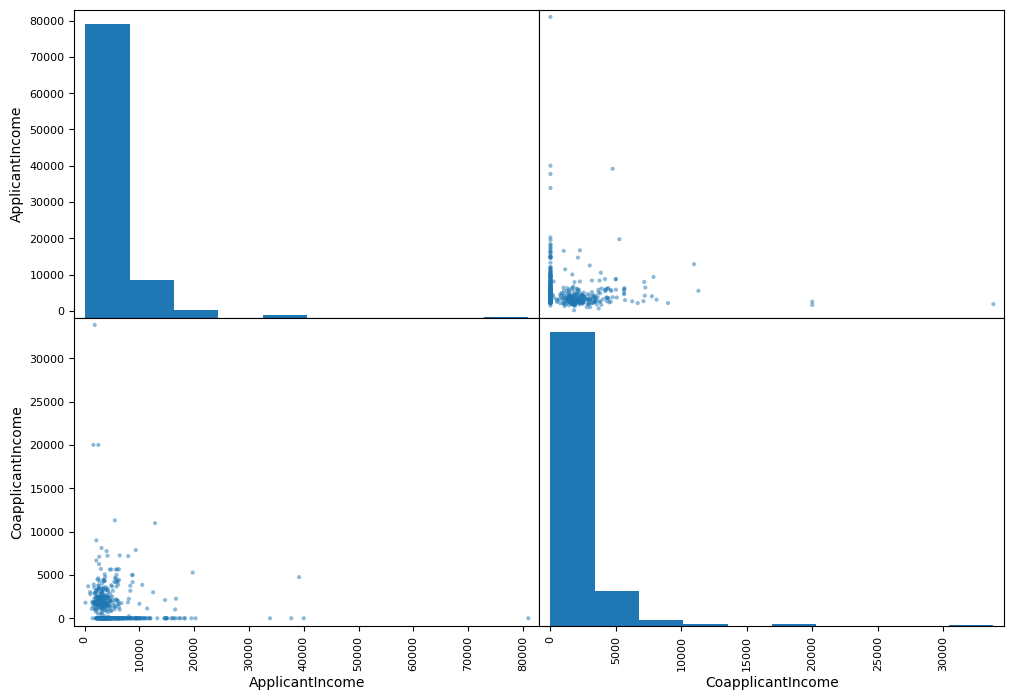

In [19]:
from pandas.plotting import scatter_matrix
attributes =['ApplicantIncome','CoapplicantIncome','Self_Employed'] # finding correlation graph one with another
scatter_matrix(loan_dataset[attributes],figsize=(12,8))

In [20]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [21]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,Y


In [22]:
loan_dataset = loan_dataset.drop(['Loan_ID'],axis=1)

In [23]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [24]:
# Print the data and labels
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

# Train and Test the data

In [25]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [26]:
# Printing the data
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


# Training the Model

# Here we use Support Vector machine Model for traing our model

In [27]:
# # Decision tree Algorithm
# from sklearn import tree
# classifier = tree.DecisionTreeClassifier()
# classifier = classifier.fit(X_train,Y_train)

In [28]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,Y_train)

GaussianNB()

In [29]:
# # Random Forest Classifier
# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier()
# classifier.fit(X_train,Y_train)

In [30]:
# # SVM Algorithm
# classifier = svm.SVC(kernel='linear')
# #training the support Vector Macine model
# classifier.fit(X_train,Y_train)

In [31]:
#Model Evaluation
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [32]:
print('Accuracy on training data : ', training_data_accuray*100)

Accuracy on training data :  79.94791666666666


In [33]:
# accuracy score on testing data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [34]:
print('Accuracy on test data : ', test_data_accuray*100)

Accuracy on test data :  81.25


# Develop a Predictive System

In [35]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    #Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area

    input_data = (1,1,0,0,0,17,2840,114,360,0,0)


    # changing the input_data to a numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the np array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    prediction = classifier.predict(input_data_reshaped)
    # print(prediction)

    if (prediction[0]=='Y'):
      print('You can get a loan')
    else:
      print('You are not eligible to get a loan')


You are not eligible to get a loan


# Saving the Trained module

In [39]:
import pickle

In [40]:
filename = 'trained_model.sav'
pickle.dump(classifier,open(filename,'wb'))

In [41]:
#Loading the saved module
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [42]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    #Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area

    input_data = (1,1,0,0,0,17,2840,114,360,0,0)


    # changing the input_data to a numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the np array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    prediction = loaded_model.predict(input_data_reshaped)
    # print(prediction)

    if (prediction[0]=='Y'):
      print('You can get a loan')
    else:
      print('You are not eligible to get a loan')


You are not eligible to get a loan
